# Importaciones necesarias

In [ ]:
# Importamos todo lo necesario

from google.colab import drive
from zipfile import ZipFile
import os
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import missingno as msno
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")


# Descarga del dataset

In [ ]:
# Instalación del paquete de Kaggle
!pip install -U -q kaggle

# Creación de un directorio para las credenciales de Kaggle
# (Deberá tener sus credenciales de usuario en un archivo kaggle.json y subirlo)
# Si no lo tiene, vaya a su perfil de Kaggle/Account/API/Create New API Token
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/

# Descarga del dataset desde Kaggle a Google Colab
# (Deberá compiar el API command del dataset que desea descargar, generalmente está cerca del boton descargar localmente)
!kaggle datasets download -d nasa/kepler-exoplanet-search-results


Saving kaggle.json to kaggle.json
  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 174MB/s]


# Carga del dataset

In [ ]:
with ZipFile('kepler-exoplanet-search-results.zip', 'r') as zip:
  # Extrae todo el contenido
  zip.extractall()
  
# Verifica que los archivos hayan sido extraídos correctamente
os.listdir()
del zip

In [ ]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('cumulative.csv')
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Renombrando las columnas

In [ ]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df.head().T

,0,1,2,3,4
rowid,1,2,3,4,5
KepID,10797460,10797460,10811496,10848459,10854555
KOIName,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
KeplerName,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
ExoplanetArchiveDisposition,CONFIRMED,CONFIRMED,FALSE POSITIVE,FALSE POSITIVE,CONFIRMED
DispositionUsingKeplerData,CANDIDATE,CANDIDATE,FALSE POSITIVE,FALSE POSITIVE,CANDIDATE
DispositionScore,1.0,0.969,0.0,0.0,1.0
NotTransit-LikeFalsePositiveFlag,0,0,0,0,0
koi_fpflag_ss,0,0,1,1,0
CentroidOffsetFalsePositiveFlag,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   rowid                                                  9564 non-null   int64  
 1   KepID                                                  9564 non-null   int64  
 2   KOIName                                                9564 non-null   object 
 3   KeplerName                                             2294 non-null   object 
 4   ExoplanetArchiveDisposition                            9564 non-null   object 
 5   DispositionUsingKeplerData                             9564 non-null   object 
 6   DispositionScore                                       8054 non-null   float64
 7   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 8   koi_fpflag_ss                                   

In [ ]:
# Generación de estadisticas descriptivas sobre la base de datos
df.describe()


,rowid,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


# Análsis de la variable objetivo **"ExoplanetArchiveDisposition"**  

In [ ]:
df2=df.copy()

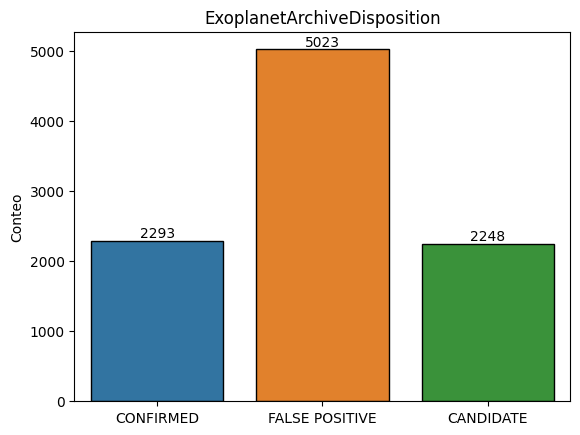

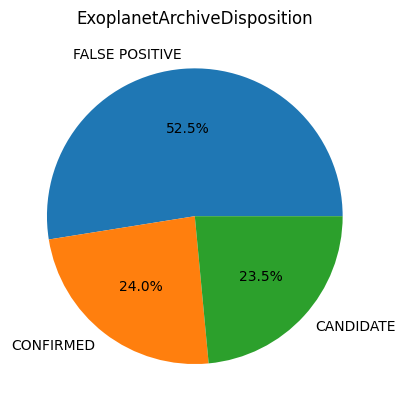

In [ ]:
# Crear un gráfico de barras
ax = sns.countplot(data=df2, x='ExoplanetArchiveDisposition', linewidth=1, edgecolor='black')
ax.set_title('ExoplanetArchiveDisposition')
ax.set_xlabel('')
ax.set_ylabel('Conteo')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

# crear un diagrama circular
value_counts = df2['ExoplanetArchiveDisposition'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('ExoplanetArchiveDisposition')
print("\n\n")
plt.show()


Podemos observar que la distribución de **FALSE POSITIVE** es mayor respecto a **CANDIDATE** y **CONFIRMED**, esto podría alterar considerablemente cualquier tipo de resultado al haber un desbalance evidente, lo que singifica que como desición se tomará trabajar sólo con **CANDIDATE** y **CONFIRMED**, tendríamos un problema biclase, y el tamaño del dataset se reduce a (4541, 50)

In [ ]:
# Eliminacion de falsos positivos
false_positives = df2[df2['ExoplanetArchiveDisposition'] == "FALSE POSITIVE"]
df2 = df2.drop(false_positives.index).reset_index(drop=True)


In [ ]:
print("Original: ", df.shape)
print("Modificado", df2.shape)


Original:  (9564, 50)
Modificado (4541, 50)


## Variable objetivo como un problema biclase

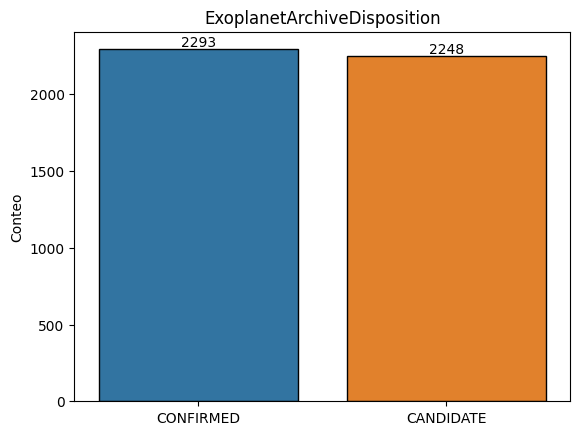

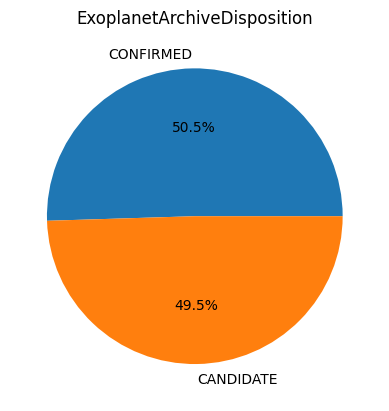

In [ ]:
labels = ["CONFIRMED", "CANDIDATE"]

# Crear el gráfico de barras 
ax = sns.countplot(data=df2, x='ExoplanetArchiveDisposition', linewidth=1, edgecolor='black')
ax.set_xticklabels(labels)
ax.set_title('ExoplanetArchiveDisposition')
ax.set_xlabel('')
ax.set_ylabel('Conteo')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

# crear un diagrama circular
value_counts = df2['ExoplanetArchiveDisposition'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('ExoplanetArchiveDisposition')
print("\n\n")
plt.show()


Ahora tenemos un dataset más equilibrado

# **Preprocesado del dataset**

## Codificando la variable objetivo

In [ ]:
#Transformacion de la salida ExoplanetArchiveDisposition a valores numéricos
df2['ExoplanetArchiveDisposition'] = df2['ExoplanetArchiveDisposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0 if x == 'CANDIDATE' else 2)


## Eliminando Columnas innecesarias

In [ ]:
# Son columnas como el nombre asignado a exoplanetas confirmados como "KeplerName" o el numero de la fila "rowid", así como columnas que directamente no tienen datos, como "EquilibriumTemperatureUpperUncK"
df2 = df2.drop(['DispositionUsingKeplerData', 'KepID', 'rowid', 'KOIName', 'KeplerName', 'EquilibriumTemperatureUpperUncK', 'EquilibriumTemperatureLowerUncK'], axis = 1)


el tamaño del dataset se reduce a (4541, 45), Pero sin la valiable objetivo será (4541, 44)

## Aplicando One Hot Encodign a columnas necesarias

In [ ]:
# one hot encode TCEDeliver
delivname_dummies = pd.get_dummies(df2['TCEDeliver'], prefix = "TCEDeliver")
df2 = df2.drop('TCEDeliver', axis = 1)
df2 = pd.concat([df2, delivname_dummies], axis = 1)


## Generando un poco de ruido en el dataset

Ejecute sólo si desea agregar ruido; pero por defecto, el dataset tiene bastantes datos nulos

In [ ]:
shape = df2.shape

# Generar una matriz de números aleatorios con la misma forma que el DataFrame
rand_arr = np.random.rand(shape[0], shape[1])

# Comparar los números aleatorios para determinar qué valores deben faltar
missing = rand_arr < 0.05 #Valores NaN en aprox un 5% del dataset

# Excluir la columna 'columna_a' de la operación de generación de ruido
exclude_column = ['ExoplanetArchiveDisposition']
for col in exclude_column:
    if col in df2.columns:
        missing[:, df2.columns.get_loc(col)] = False

# Agregar valores faltantes al DataFrame
df2[missing] = np.NaN


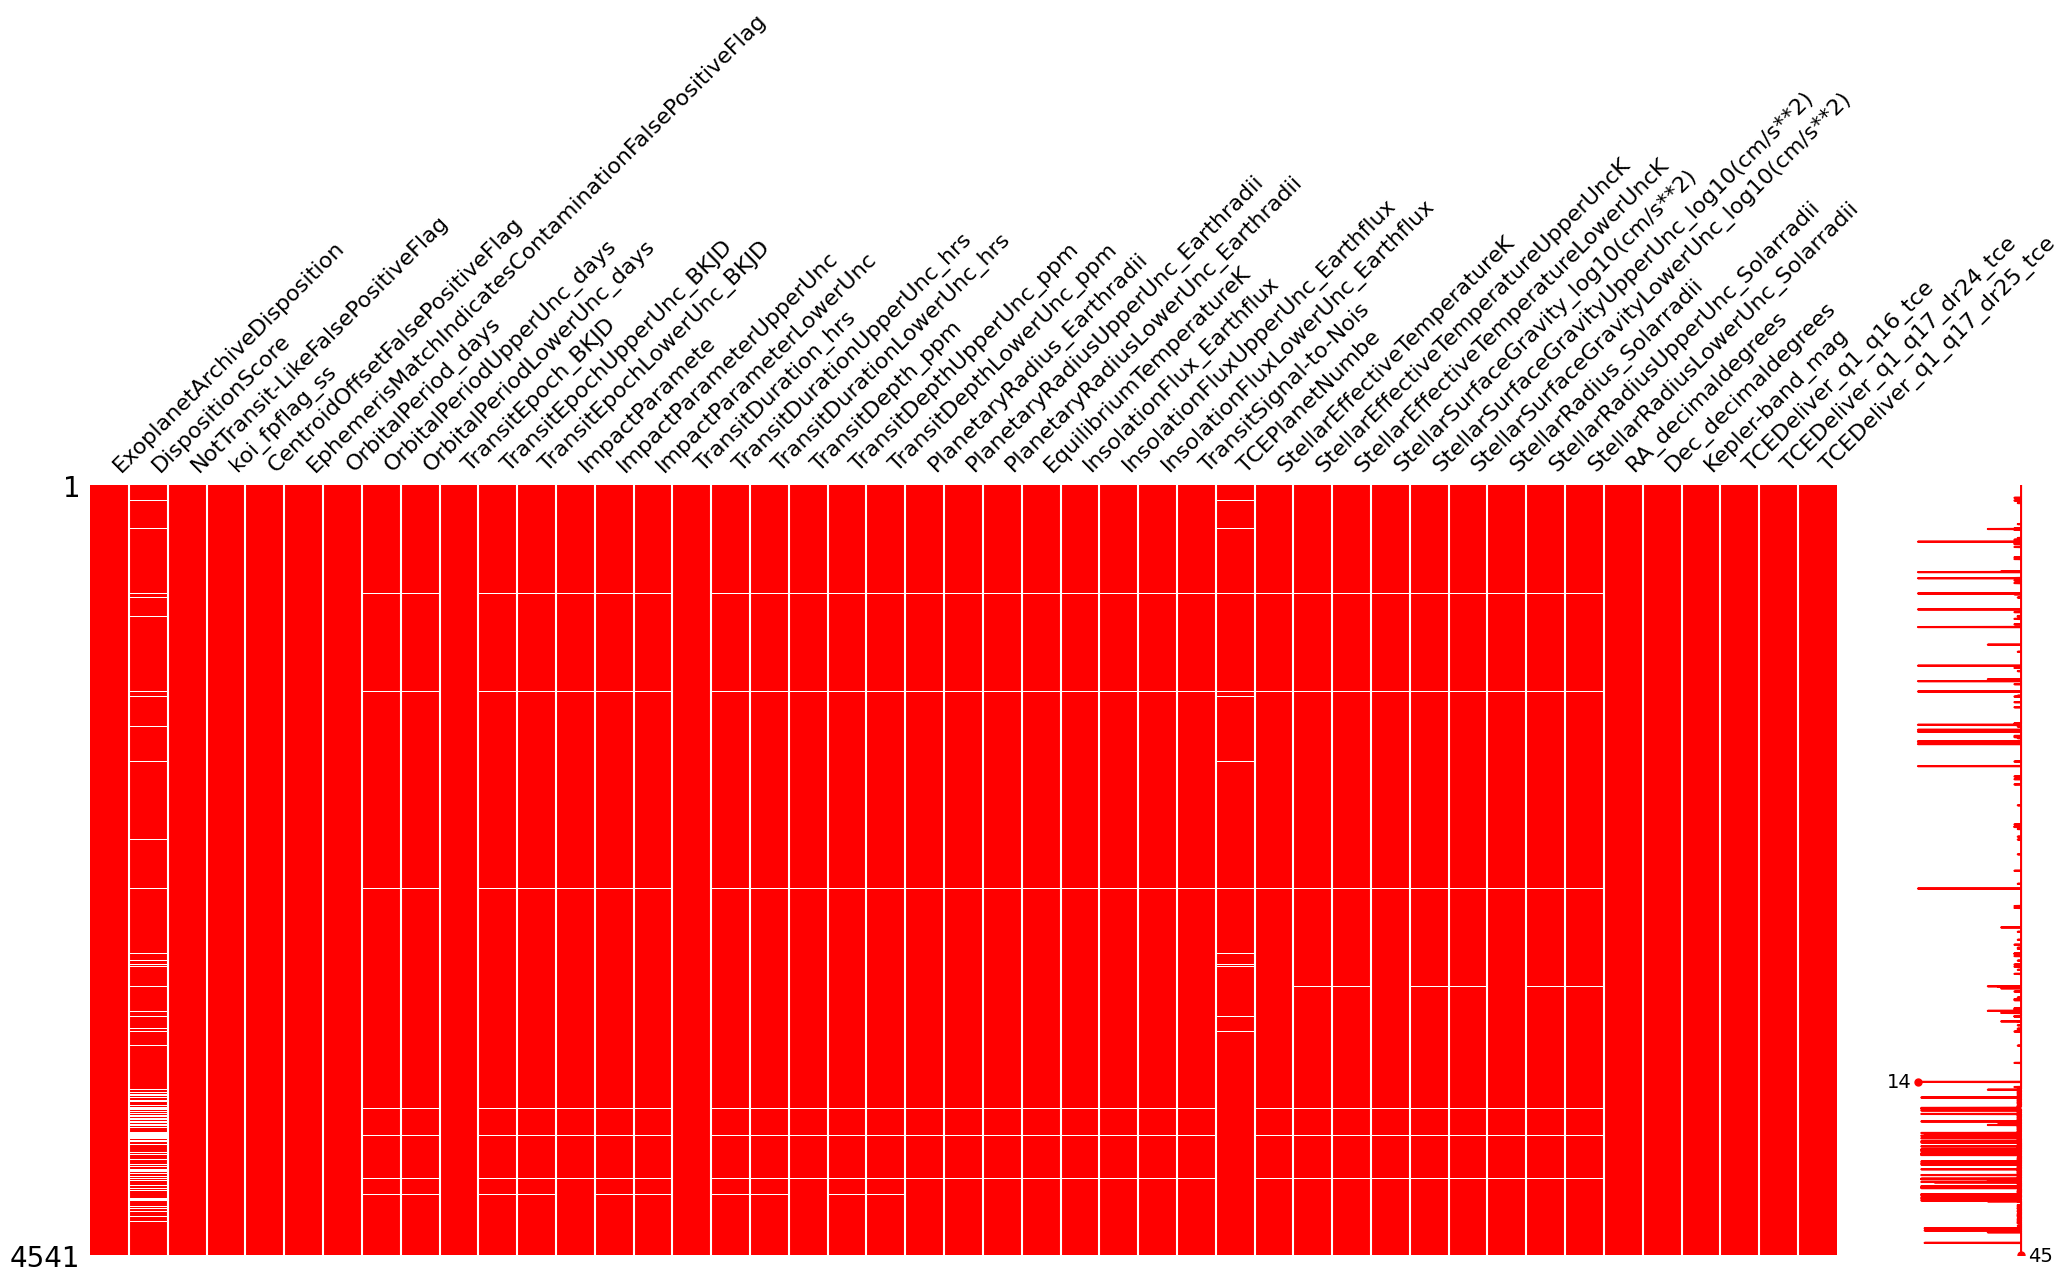

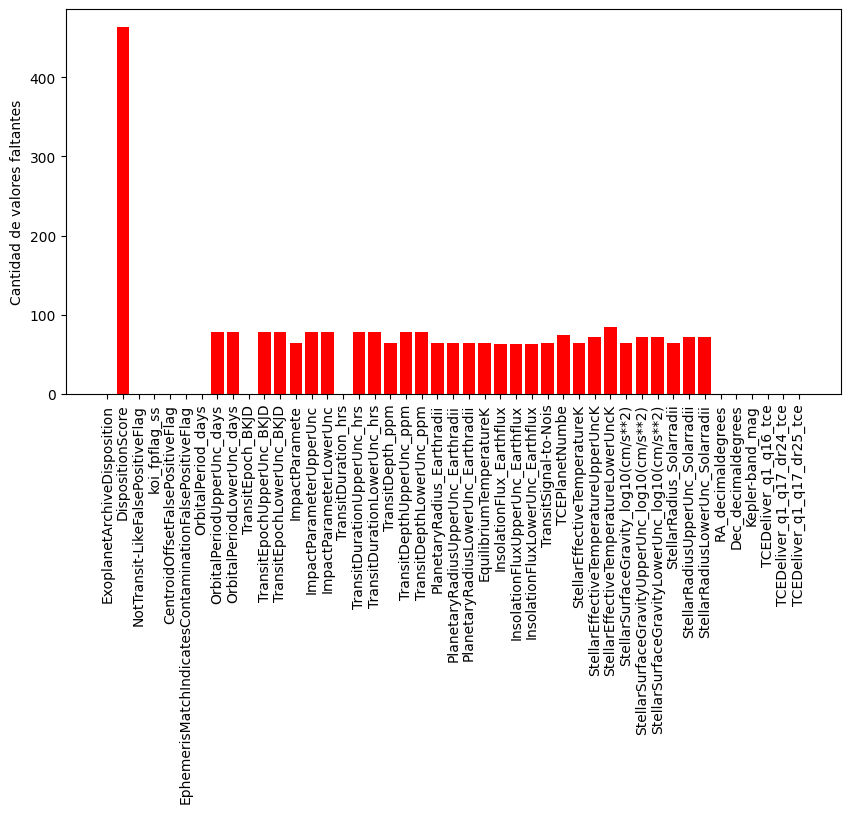

In [ ]:
# Graficar los valores faltantes antes de la limpieza
msno.matrix(df2, color=(1.0, 0.0, 0.0))
missing_before = df2.isnull().sum()

# Crear un gráfico de barras que muestre la cantidad de valores faltantes
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(missing_before.index, missing_before.values, color='red')
ax.set_xticklabels(missing_before.index, rotation=90)
ax.set_ylabel('Cantidad de valores faltantes')
plt.show()


## Reparando vales nulos para el dataset

In [ ]:
cols = df2.columns

# Recorrer todas las columnas y llenar los valores faltantes con la mediana o la media
for col in cols:
    if df2[col].dtype == 'int':
        # Si la columna es de tipo int, llenar los valores faltantes con la mediana
        df2[col].fillna(df2[col].median(), inplace=True)
    elif df2[col].dtype == 'float':
        df2[col].fillna(df2[col].mean(), inplace=True)

df2['NotTransit-LikeFalsePositiveFlag'] = df2['NotTransit-LikeFalsePositiveFlag'].astype('int64')
df2['koi_fpflag_ss'] = df2['koi_fpflag_ss'].astype('int64')
df2['CentroidOffsetFalsePositiveFlag'] = df2['CentroidOffsetFalsePositiveFlag'].astype('int64')
df2['EphemerisMatchIndicatesContaminationFalsePositiveFlag'] = df2['EphemerisMatchIndicatesContaminationFalsePositiveFlag'].astype('int64')
df2['TCEDeliver_q1_q16_tce'] = df2['TCEDeliver_q1_q16_tce'].astype('int64')
df2['TCEDeliver_q1_q17_dr24_tce'] = df2['TCEDeliver_q1_q17_dr24_tce'].astype('int64')
df2['TCEDeliver_q1_q17_dr25_tce'] = df2['TCEDeliver_q1_q17_dr25_tce'].astype('int64')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541 entries, 0 to 4540
Data columns (total 45 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ExoplanetArchiveDisposition                            4541 non-null   int64  
 1   DispositionScore                                       4541 non-null   float64
 2   NotTransit-LikeFalsePositiveFlag                       4541 non-null   int64  
 3   koi_fpflag_ss                                          4541 non-null   int64  
 4   CentroidOffsetFalsePositiveFlag                        4541 non-null   int64  
 5   EphemerisMatchIndicatesContaminationFalsePositiveFlag  4541 non-null   int64  
 6   OrbitalPeriod_days                                     4541 non-null   float64
 7   OrbitalPeriodUpperUnc_days                             4541 non-null   float64
 8   OrbitalPeriodLowerUnc_days                      

<Axes: >

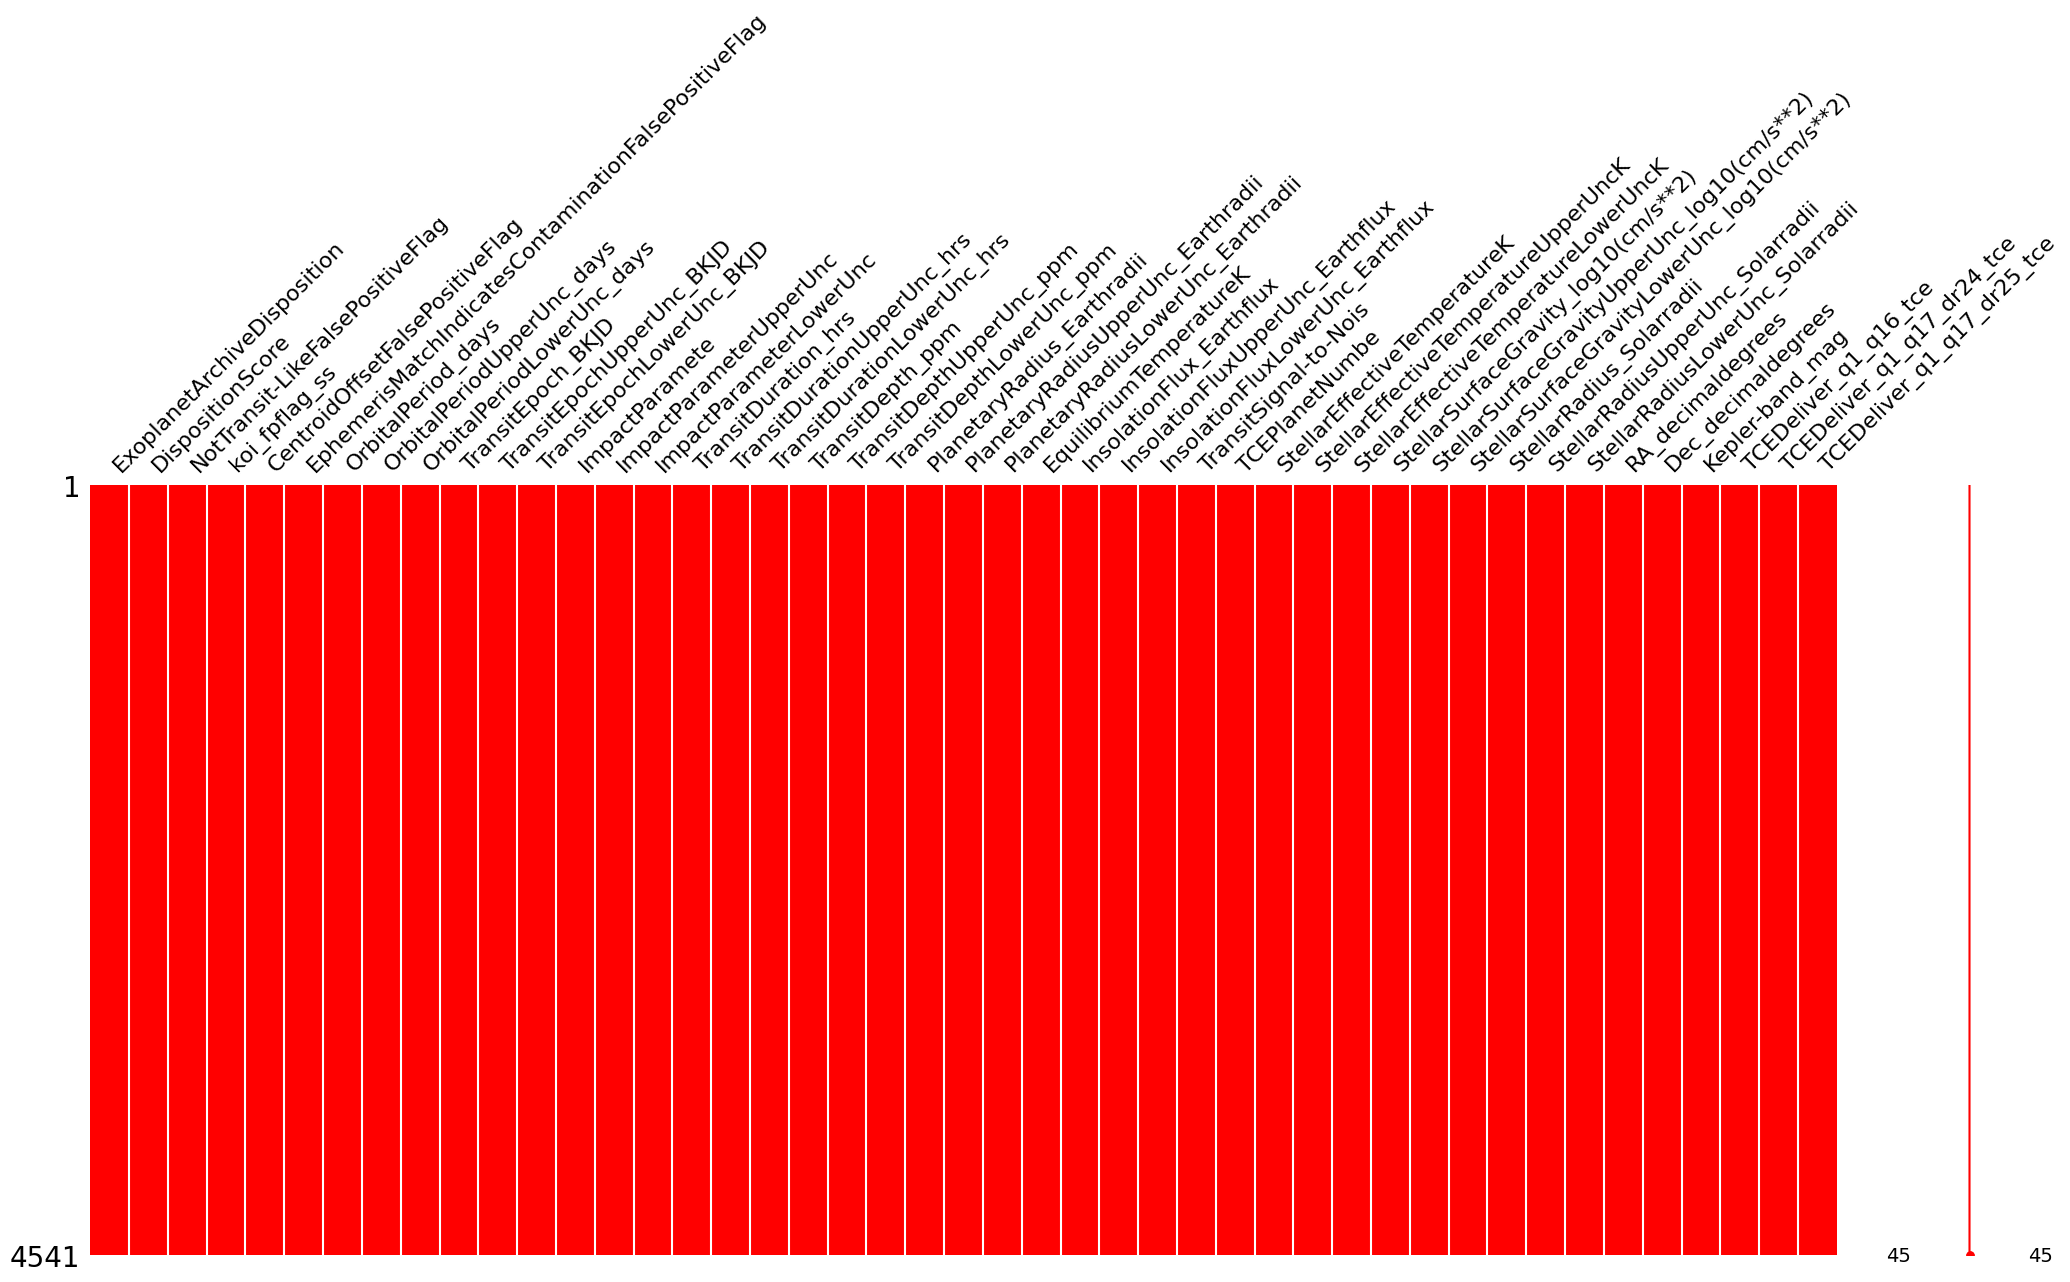

In [ ]:
# Graficar los valores faltantes despues de la limpieza
msno.matrix(df2, color=(1.0, 0.0, 0.0))

# Correlacion lineal de las características

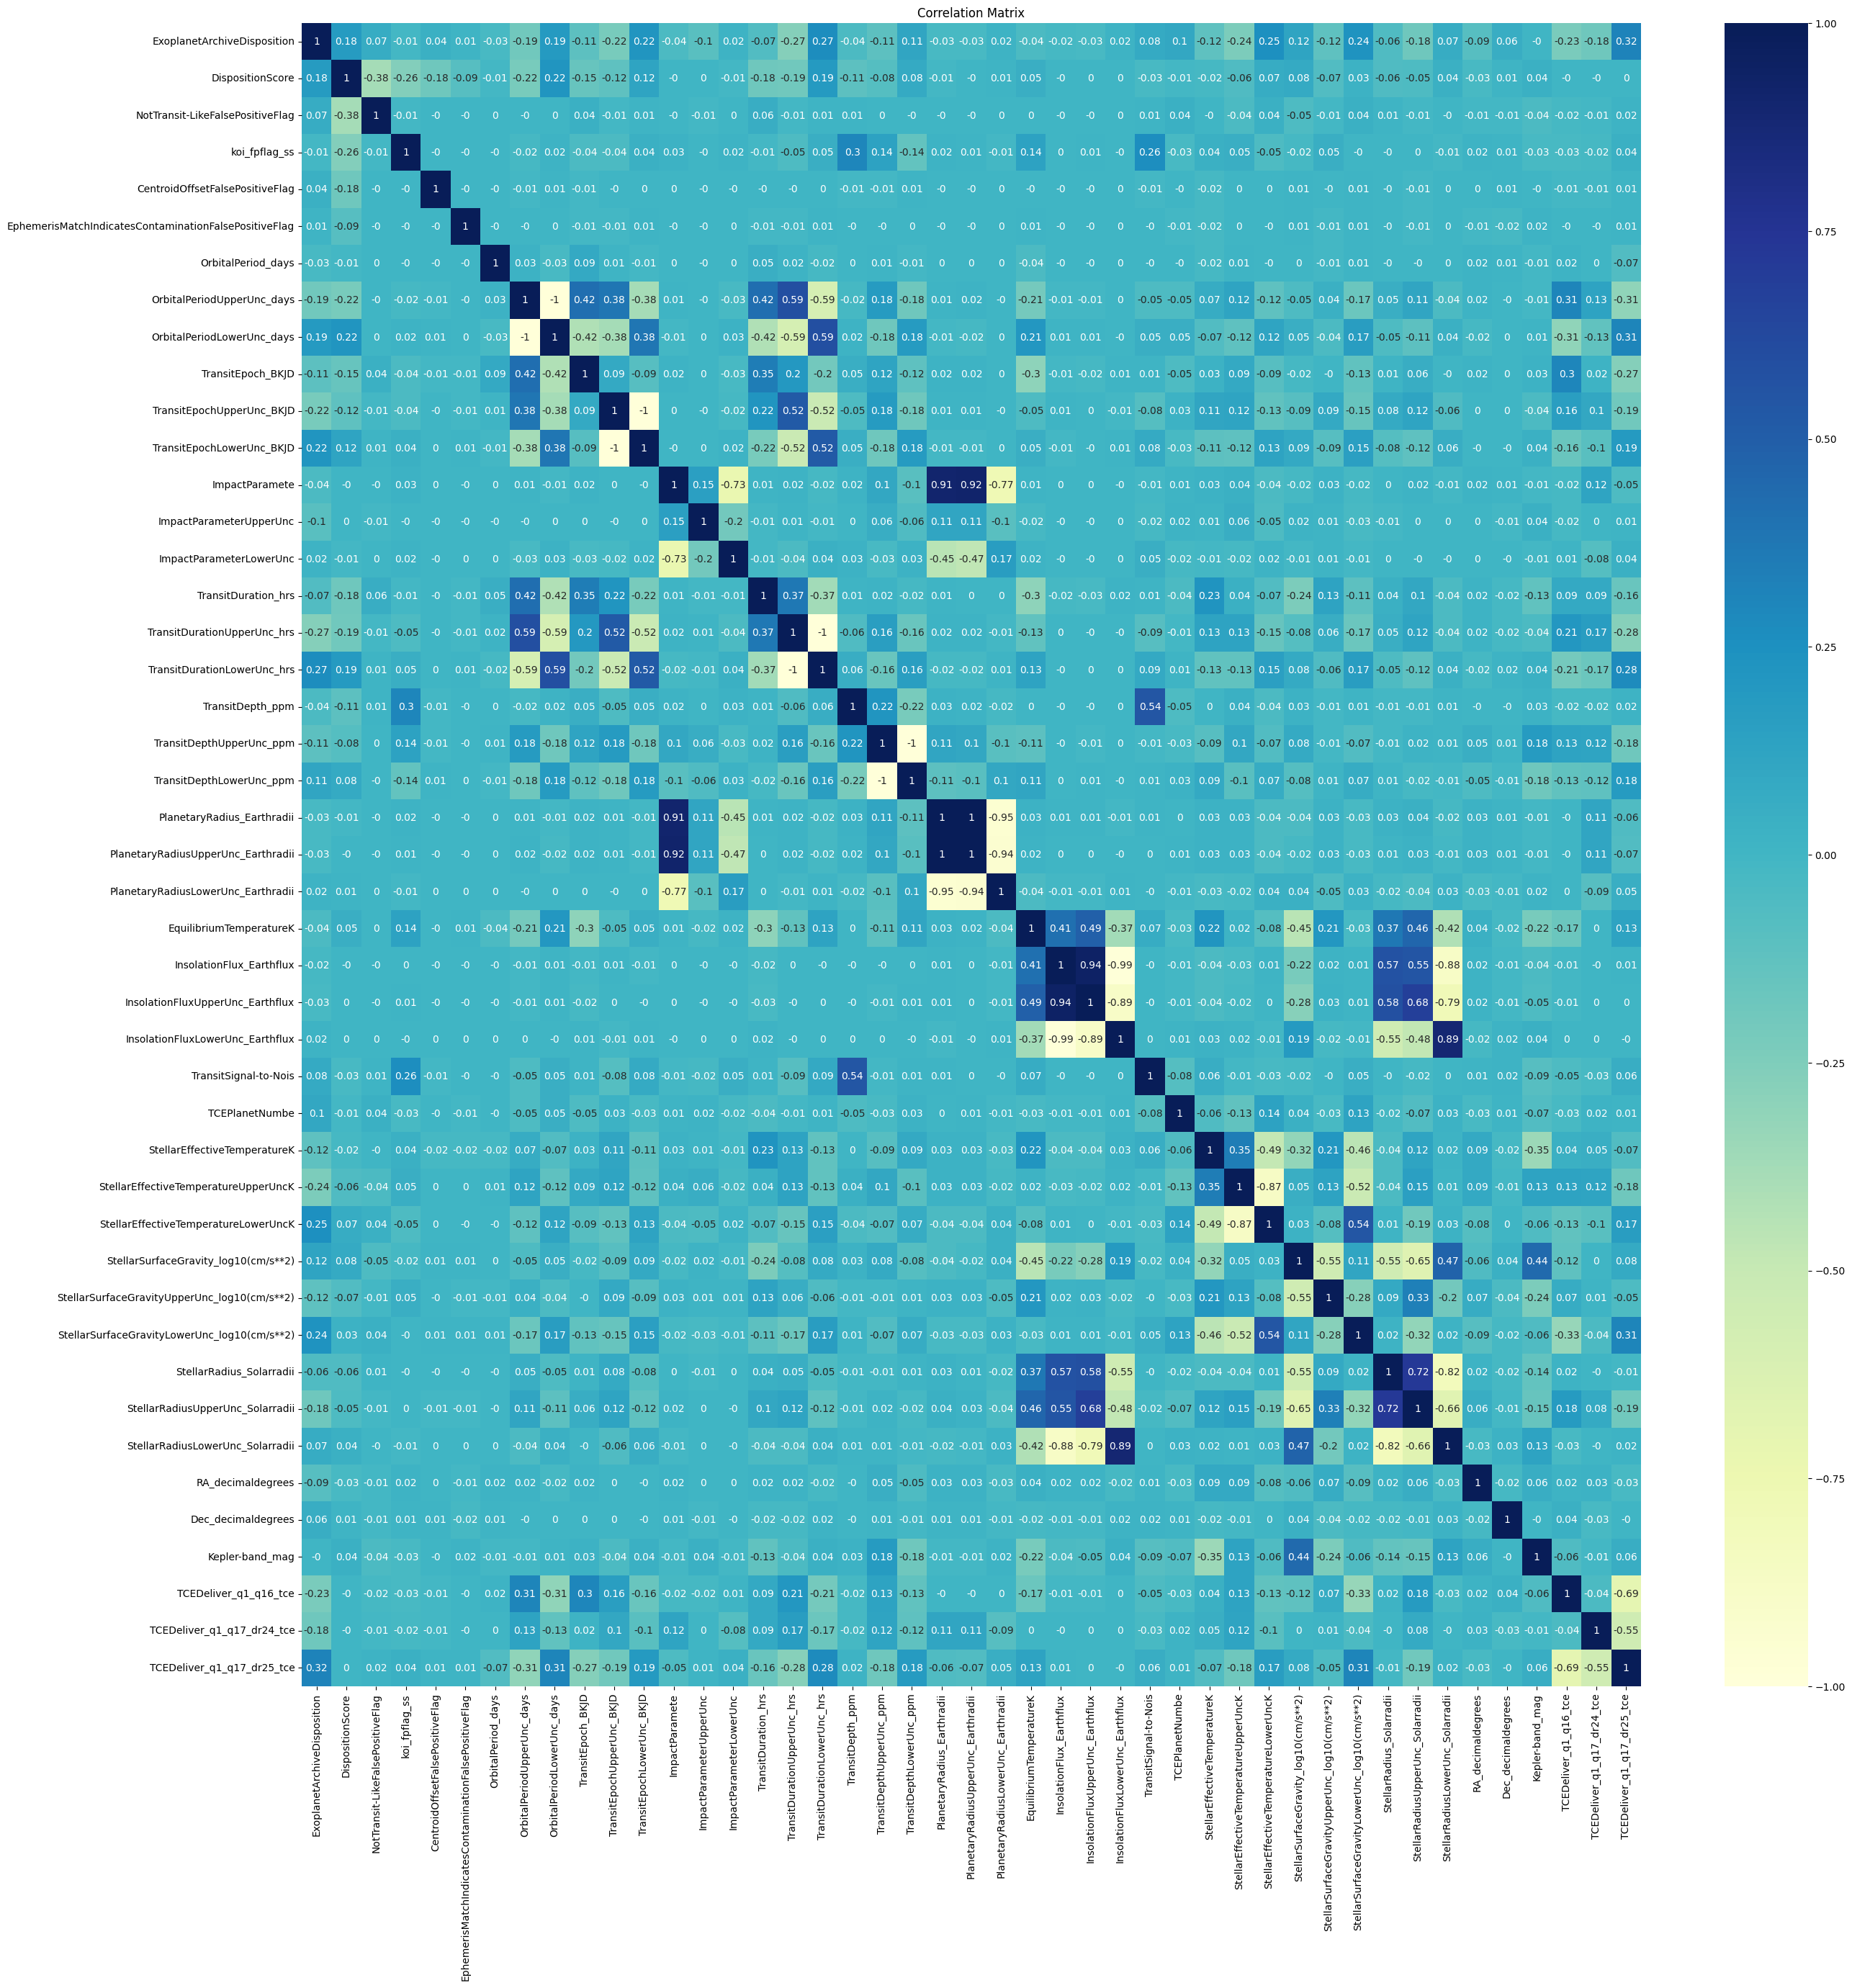

In [ ]:
#Matriz de correlaciones
corr_matrix = df2.corr().round(2)
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()


## Correlacion lineal respecto a la variable objetivo **"ExoplanetArchiveDisposition"**                     

In [ ]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = corr_matrix["ExoplanetArchiveDisposition"].sort_values(ascending=False)
target_corr_df = pd.DataFrame(target_corr_df)
target_corr_df


,ExoplanetArchiveDisposition
ExoplanetArchiveDisposition,1.00
TCEDeliver_q1_q17_dr25_tce,0.32
TransitDurationLowerUnc_hrs,0.27
StellarEffectiveTemperatureLowerUncK,0.25
StellarSurfaceGravityLowerUnc_log10(cm/s**2),0.24
TransitEpochLowerUnc_BKJD,0.22
OrbitalPeriodLowerUnc_days,0.19
DispositionScore,0.18
StellarSurfaceGravity_log10(cm/s**2),0.12
TransitDepthLowerUnc_ppm,0.11


# Visualizando la frecuencia de las columnas

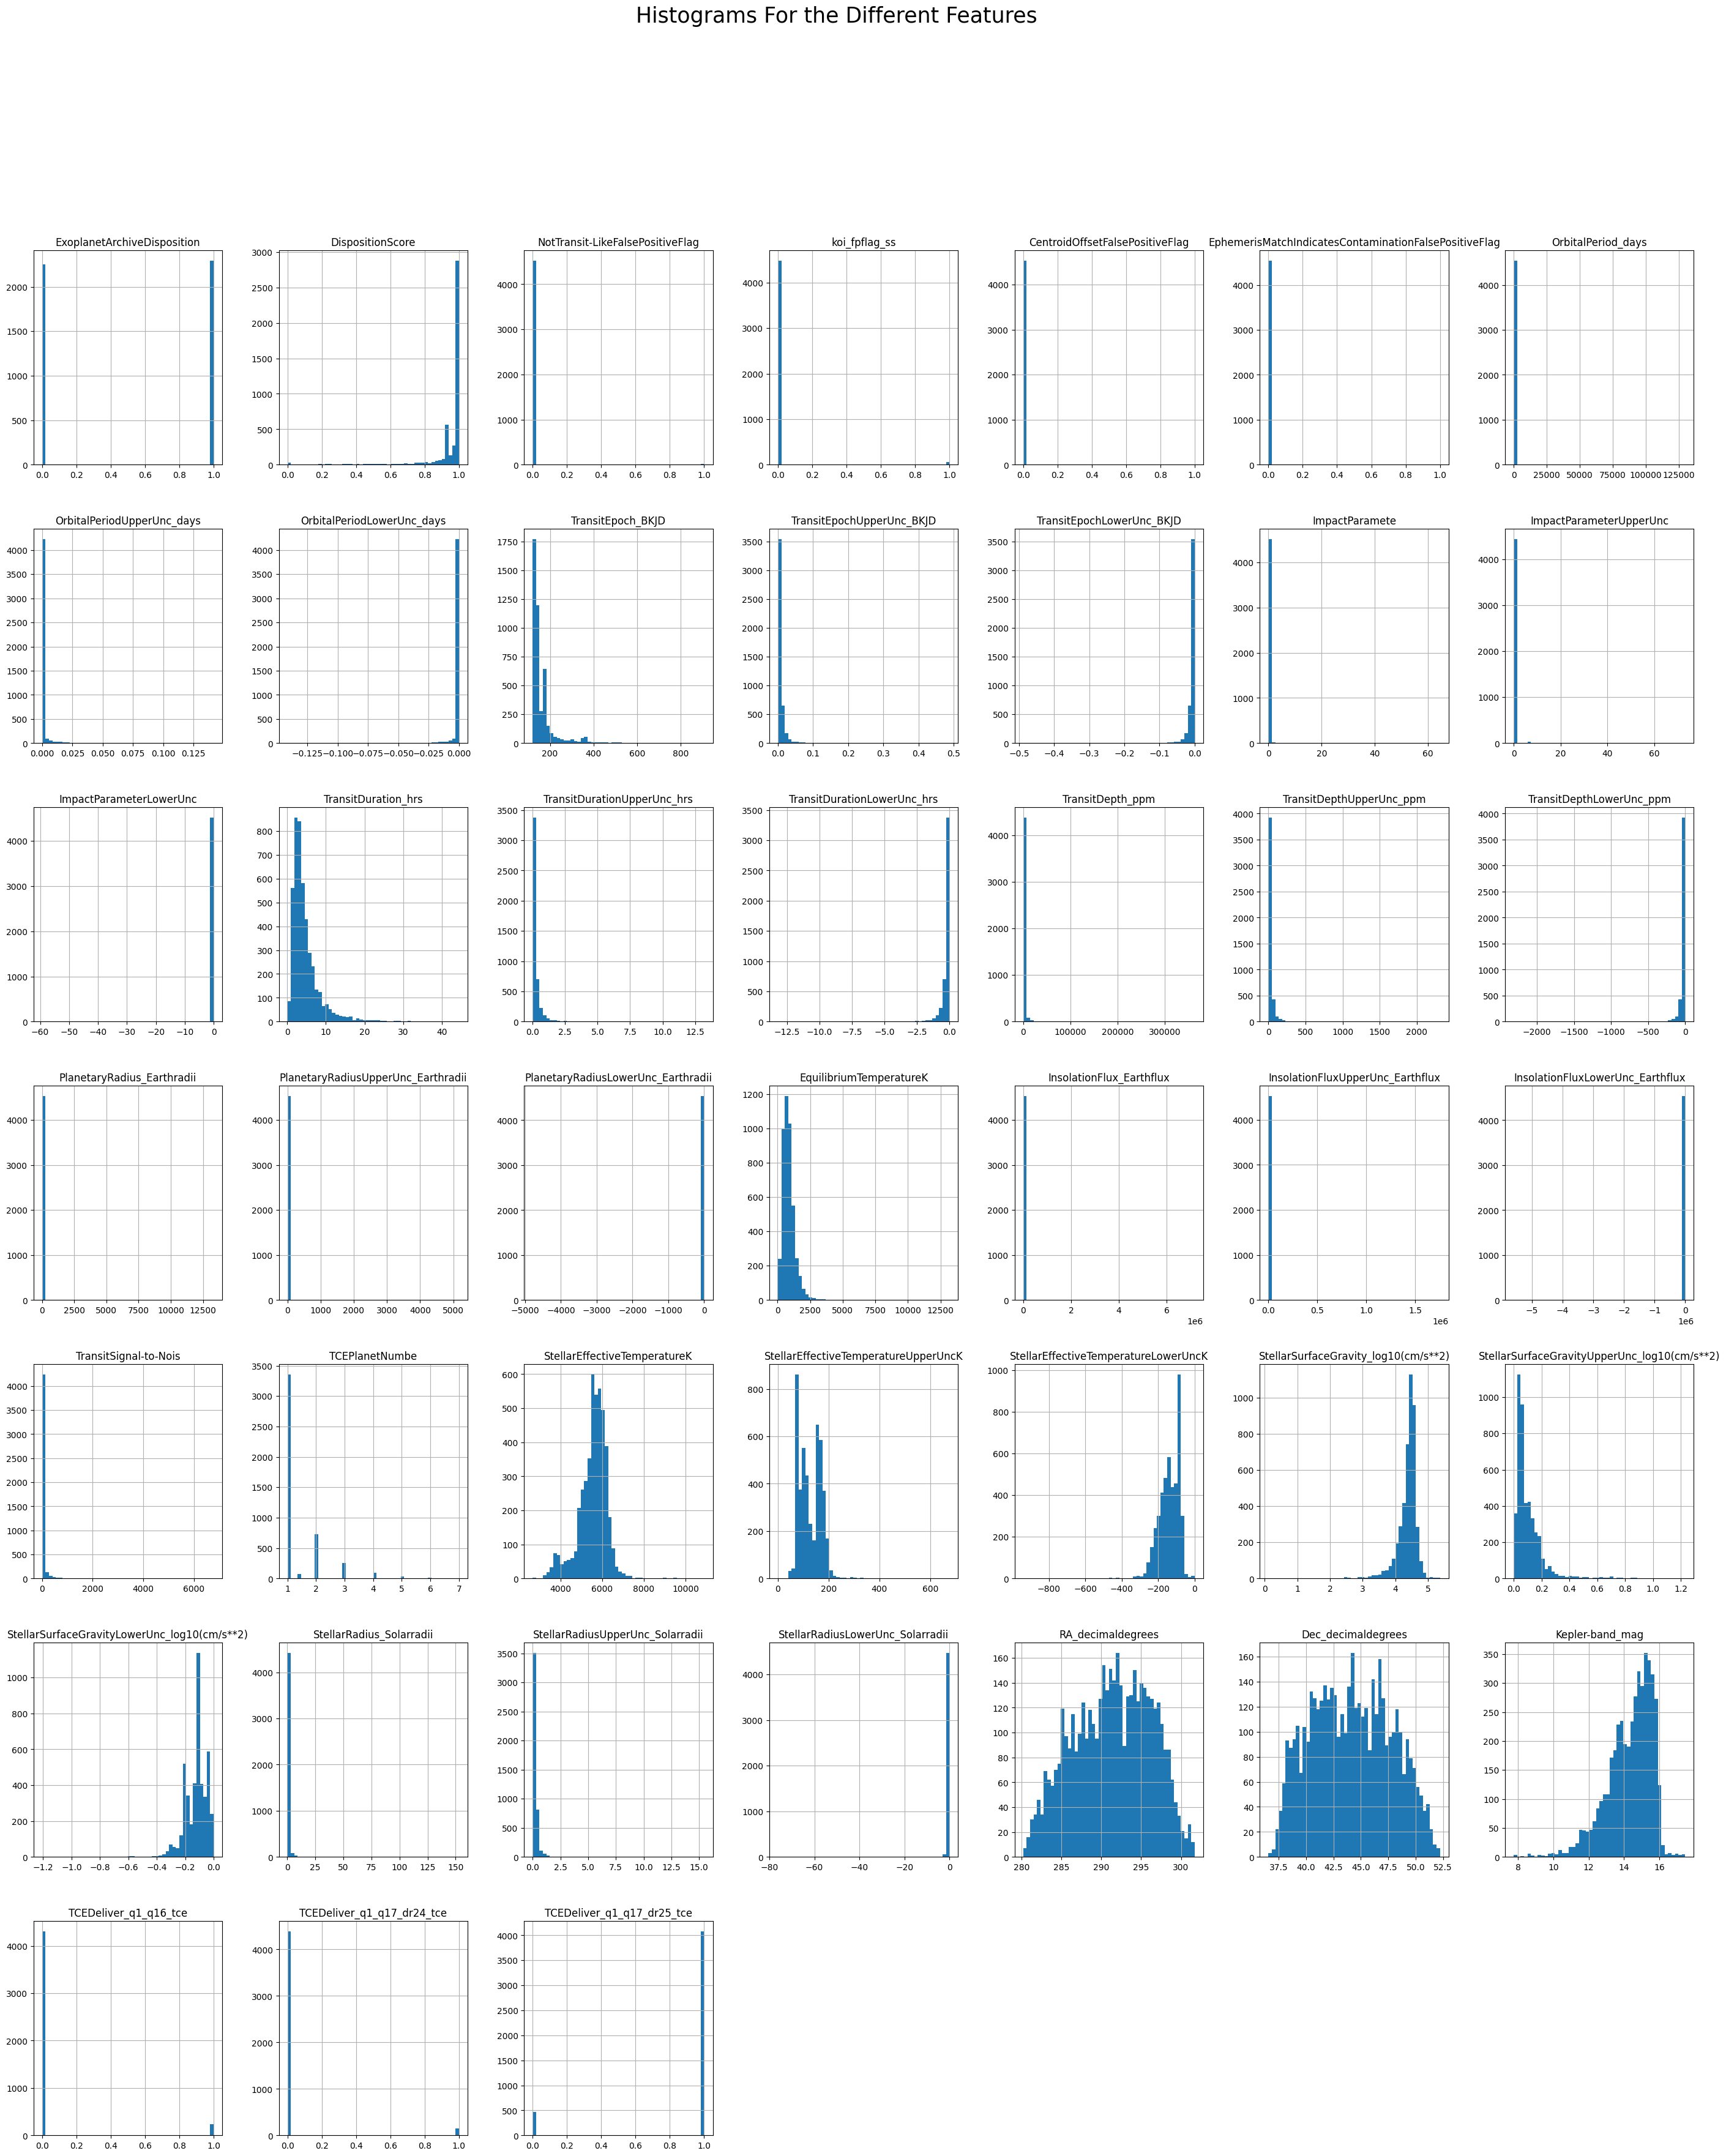

In [ ]:
#Gráficos de los histogramas de las distribuciones de las variables
df2.hist(bins=50, figsize=(35,40))
plt.suptitle('Histograms For the Different Features', fontsize=25)
plt.show()


# Visualizando la distribución de las columnas

In [ ]:
# Utilizar la función plot() de pandas para graficar todas las columnas
df2.plot(subplots=True, figsize=(40,80))
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Guardar el dataset para continuar trabajando en el notebook **02 - modelado supervisado y no supervisado**

In [ ]:
# Monta Google Drive
drive.mount('/content/drive')


In [ ]:
# Ruta de guardado en Google Drive
ruta_guardado = '/content/drive/MyDrive/cumulative_preprocesado.csv'
df2.to_csv(ruta_guardado, index=False)
